# Kīlauea Volcano Hazards Analysis
## GPGN 268 Final Project
#### Clara Pugh and Lillian Hanson

## Put problem statement/introduction

In [14]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import contextily as ctx

# Lava Flows

Kīlauea Lava Flow Image (Source: USGS Kīlauea Images)
![Kīlauea Lava Flow](../figures/lava-flow-image-USGS.jpg)

#### 2014-2016 Lava Flows

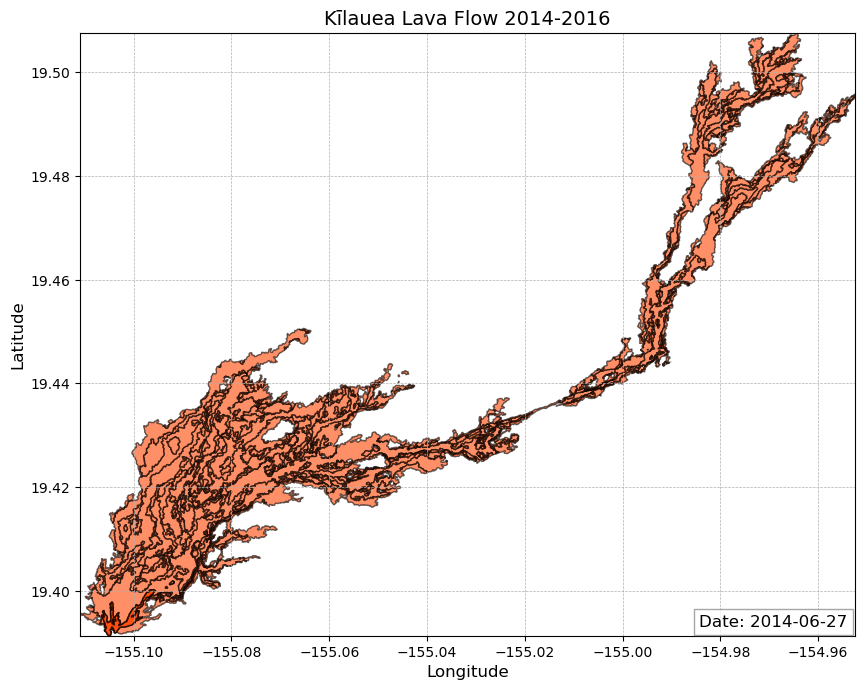

In [26]:
# Load and prepare data
df1 = gpd.read_file('../data/05_2014-2016_kilauea_lava_shapefiles/Ep61e_flow.shp')
df1 = df1.to_crs(epsg=4326)  # Keeping the coordinates in EPSG 4326 (Lat/Lon)
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date').reset_index(drop=True)

# Precompute the bounds to keep consistent frame size
bounds = df1.total_bounds  # [minx, miny, maxx, maxy]

# Prepare figure
fig, ax = plt.subplots(figsize=(10, 8))

# This will store the cumulative flow
cumulative = gpd.GeoDataFrame(geometry=[], crs=df1.crs)  # Start empty

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    global cumulative
    cumulative = pd.concat([cumulative, df1.iloc[[frame]]], ignore_index=True)
    
    # Plot lava flow data
    cumulative.plot(ax=ax, color='orangered', edgecolor='black', alpha=0.6)

    # Set title and date stamp
    ax.set_title('Kīlauea Lava Flow 2014-2016', fontsize=14)
    date_str = df1.iloc[frame]['Date'].strftime('%Y-%m-%d')
    ax.text(0.99, 0.01, f'Date: {date_str}', transform=ax.transAxes,
            ha='right', va='bottom', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    # Axes styling
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(labelsize=10)

# Create animation (475 ms per frame)
anim = FuncAnimation(fig, update, frames=len(df1), interval=475)

# Save as a GIF 
anim.save('../figures/lava_flow_animation.gif', writer='pillow')

With this animation, we see series of fast growth, alternating with time periods with very slow, viscous lava movement. The flow volume, speed, and inferred viscosity can all be correlated with other events like high-plume events and high-SO2 emission periods. With this animation, we see series of fast growth, alternating with time periods with very slow, viscous lava movement. The flow volume, speed, and inferred viscosity can all be correlated with other events like high-plume events and high-SO2 emission periods. 

#### 2016-2017 Lava Flows

In [12]:
# read data for each shapefile
may24_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160524_flow.shp').to_crs(4326)
jun10_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160610_flow.shp').to_crs(4326)
jun30_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160630_flow.shp').to_crs(4326)
jul19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160719_flow.shp').to_crs(4326)
aug19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160819_flow.shp').to_crs(4326)
sep20_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20160920_flow.shp').to_crs(4326)
oct19_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161019_flow.shp').to_crs(4326)
nov29_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161129_flow.shp').to_crs(4326)
dec14_16 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20161214_flow.shp').to_crs(4326)
jan12_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170112_flow.shp').to_crs(4326)
feb24_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170224_flow.shp').to_crs(4326)
mar30_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170330_flow.shp').to_crs(4326)
may03_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170503_flow.shp').to_crs(4326)
may31_17 = gpd.read_file('../data/05_2016-17_kilauea_lava_shapefiles/Ep61g_20170531_flow.shp').to_crs(4326)

# Reproject all shapefiles to EPSG:3857
shapefiles = [
    may24_16, jun10_16, jun30_16, jul19_16, aug19_16, sep20_16, oct19_16,
    nov29_16, dec14_16, jan12_17, feb24_17, mar30_17, may03_17, may31_17
]
shapefiles_3857 = [gdf.to_crs(epsg=3857) for gdf in shapefiles]

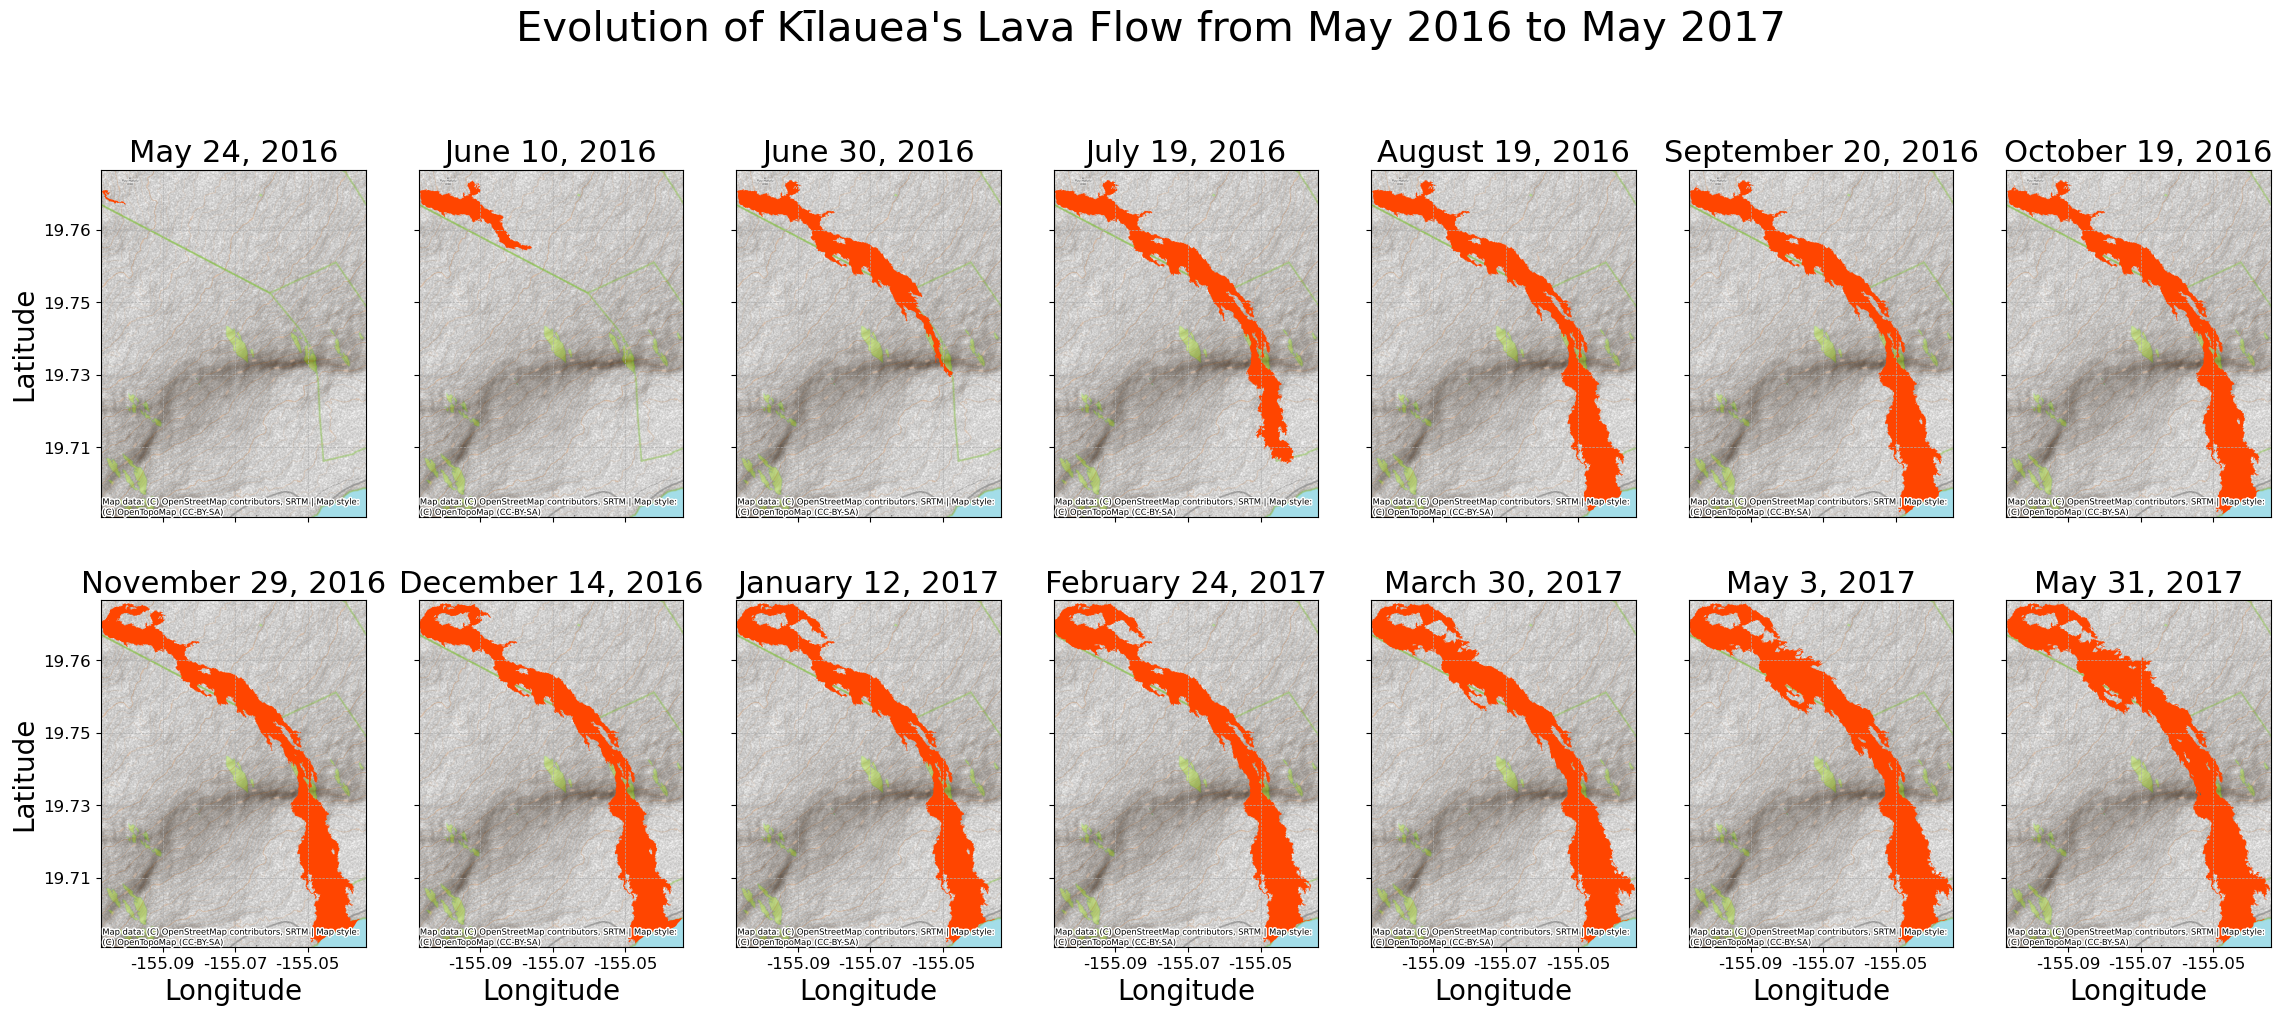

In [13]:
# Set up the plot
fig, axes = plt.subplots(2, 7, figsize=(28, 18), sharey=True, sharex=True)
axes = axes.flatten()

# Set common xlim/ylim in Web Mercator coordinates
import pyproj
project = pyproj.Transformer.from_crs(4326, 3857, always_xy=True).transform
xmin, ymin = project(-155.100453, 19.315307)
xmax, ymax = project(-155.034902, 19.396264)

# Plot each shapefile
titles = [
    'May 24, 2016', 'June 10, 2016', 'June 30, 2016', 'July 19, 2016',
    'August 19, 2016', 'September 20, 2016', 'October 19, 2016', 'November 29, 2016',
    'December 14, 2016', 'January 12, 2017', 'February 24, 2017',
    'March 30, 2017', 'May 3, 2017', 'May 31, 2017'
]
for i, ax in enumerate(axes):
    shapefiles_3857[i].plot(ax=ax, color='orangered')
    ax.set_title(titles[i], fontsize=22)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.tick_params(labelsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    
    # Only label lat/lon on the outer plots
    if i == 0 or i == 7:
        ax.set_ylabel('Latitude', fontsize=20)
    if i >= 7:
        ax.set_xlabel('Longitude', fontsize=20)
# Add satellite basemap once for all subplots
for ax in axes:
    ctx.add_basemap(
        ax, 
        source=ctx.providers.OpenTopoMap,  # Satellite tiles
        crs=shapefiles_3857[0].crs.to_string(), 
        attribution_size=6
    )

# Format ticks as degrees
import matplotlib.ticker as mticker

def meters_to_degrees(x, pos):
    # Approximate conversion: 1 degree ~ 111,319 meters at equator
    return round(x / 111319, 2)

for ax in axes:
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(meters_to_degrees))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(meters_to_degrees))

plt.suptitle("Evolution of Kīlauea's Lava Flow from May 2016 to May 2017", fontsize=30, y=0.8)
plt.subplots_adjust(hspace=-0.55)
plt.show()

fig.savefig('../figures/2016-17_lava.png', dpi=300, bbox_inches='tight')

We can see that there was a lot of expansion of the lava flow from May to August 2016, and then it started slowing down its growth 

## Volcanic Plume

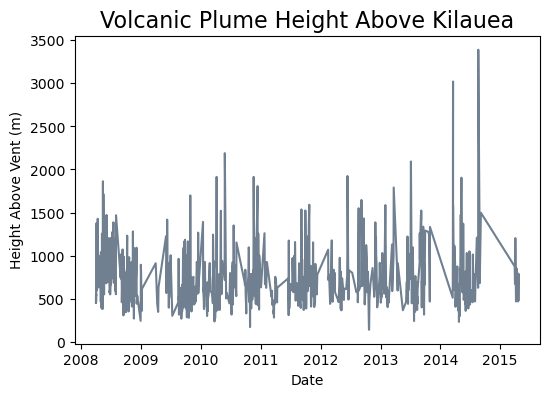

In [6]:
plume_data_2008_2015 = pd.read_csv('../data/plume_heights/EruptionPlumeHeights_2008-2015.csv')

# convert dates from file into numpy datetime64 format
new_dates = []
for dates in plume_data_2008_2015['Date (HST)']:
    date = dates.split(' ')[0]
    date_split = date.split('/')
    month = date_split[0]
    day = date_split[1]
    if len(day) == 1:
        day = f'0{day}'
    if len(month) == 1:
        month = f'0{month}'
    year = date_split[2]
    time = dates.split(' ')[1]
    times = time.split(':')
    hour = times[0]
    if len(hour) == 1:
        hour = f'0{hour}'
    minute = times[1]
    new_dates.append(f'{year}-{month}-{day}T{hour}:{minute}')
date_array = np.array(new_dates, dtype='datetime64')

# put new dates into plume data file
plume_data_2008_2015['date_new'] = date_array
plume_data_2008_2015 = plume_data_2008_2015.set_index('date_new')
plume_data_2008_2015 = plume_data_2008_2015.dropna()

# plot plume data
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(plume_data_2008_2015['Ht above vent elevation (m)'], color='slategrey')
ax.set_xlabel('Date')
ax.set_ylabel('Height Above Vent (m)')
plt.title('Volcanic Plume Height Above Kilauea', fontsize=16)
plt.show()
fig.savefig('../figures/plume_height.png')

We see in this that the elevation of the volcanic plume above Kilauea was highly variable, although it reached some peaks around the beginning and middle of 2014. 

## Lava Lake Elevation

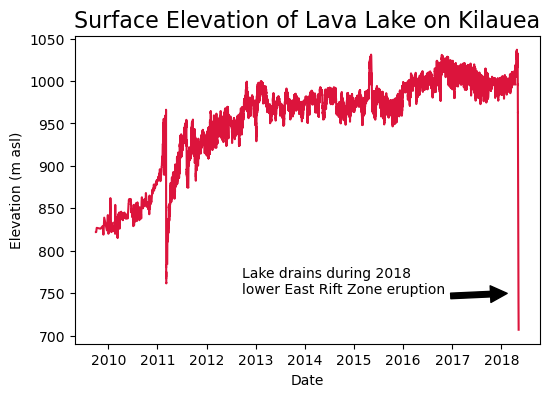

In [7]:
lava_lake_elv = pd.read_csv('../data/ContinuousLavaLakeElevation.txt', sep=',', skiprows=[1])

# convert time of measurement column to a compatible datetime format
lava_lake_elv['Time of measurement(HST)'] = pd.to_datetime(lava_lake_elv['Time of measurement(HST)'], format='ISO8601')
lava_lake_elv = lava_lake_elv.set_index('Time of measurement(HST)')

# plot figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(lava_lake_elv['Lake surface elevation(m asl)'], color='crimson')
ax.set_xlabel('Date')
ax.set_ylabel('Elevation (m asl)')
plt.title('Surface Elevation of Lava Lake on Kilauea', fontsize=16)
ax.annotate('Lake drains during 2018\nlower East Rift Zone eruption', xy=(17600,750), 
             xytext =(15600,750), arrowprops = dict(facecolor ='black', shrink = 0.05))
plt.show()
fig.savefig('../figures/lava_lake_elev.png')

We can see in this that from 2010 to 2018, the surface elevation of the lava lake on Kilauea (within the within Halemaʻumaʻu crater) was rising fairly steadily, until the volcano began to erupt in the 2018 lower East Rift Zone, which pulled a lot of the magma out from the volcano, and caused the lava lake to drain rapidly.

## SO2 Emissions

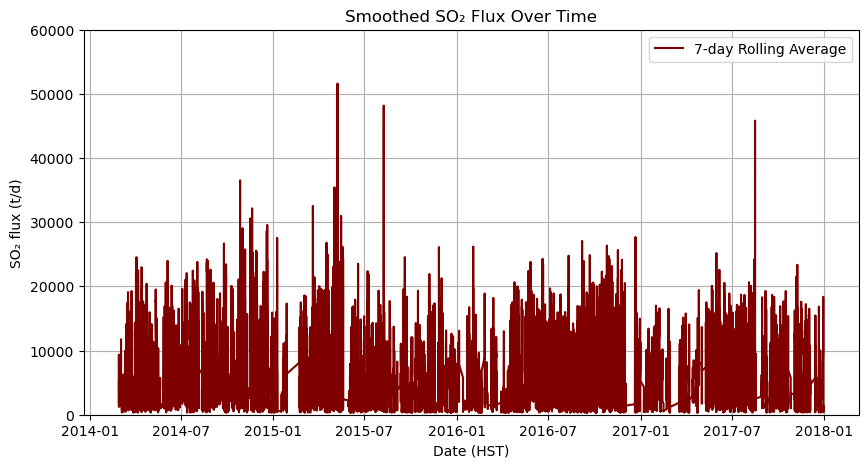

In [4]:
# graph the SO2 emissions data
so2_path = ("../data/2014-17_SO2_emission_rates/SummitSO2_FLYSPECarray_10S_2014-2017.csv")
df3 = pd.read_csv(so2_path,  usecols=['Date (HST)', 'SO2 flux (t/d)']) #create dataframe with the csv data
df3["Date (HST)"] = pd.to_datetime(df3["Date (HST)"], format="ISO8601")
df3 = df3.set_index('Date (HST)')
# Replace non-numeric values (like 'BDL') with NaN
df3['SO2 flux (t/d)'] = pd.to_numeric(df3['SO2 flux (t/d)'], errors='coerce')
# Drop rows with NaN
df3 = df3.dropna(subset=['SO2 flux (t/d)'])

#apply a 7-day rolling average to the emissions data
df3['Smoothed'] = df3['SO2 flux (t/d)'].rolling(window=7, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df3.index, df3['Smoothed'], label='7-day Rolling Average', color='maroon')
plt.ylabel('SO₂ flux (t/d)')
plt.ylim(0, 60000)
plt.xlabel('Date (HST)')
plt.title('Smoothed SO₂ Flux Over Time')
plt.grid(True)
plt.legend()
plt.savefig('../figures/SO2_emissions.png')
plt.show()

With these 7-day rolling averages we can see a wave-like pattern in SO2 emissions. The spikes may indicate heavier flow periods. When comparing with other data, we can see very steady levels of flow during high-flow times, such as June of 2016. There is a gap around January of 2017, which is interesting because another "leg" of lava flow formed around this time. 